In [467]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs
import pandas as pd
import random



In [468]:

def data_generator(cluster = 2):
  '''
  This function generates data X and Y of given cluster numbers
  X represents a point in 2D coordinates and Y is label which will be either 1 or 0 in case of 2 clusters
  '''
  X, Y = make_blobs(n_samples=500, centers=2, n_features=2)
  return X,Y

 

In [469]:

def sigmoid(x):
    return (1/(1+np.exp(-x)))


In [470]:

def initialize_parameters():
    '''
    Intializes parameters to a random value
    '''

    # Initializing Coefficients
    w1 = random.random() * 0.001
    w2 = random.random() * 0.001
    b = random.random() * 0.001

    parameters = {
        "w1" : w1,
        "w2" : w2,
        "b" : b,
    }

    print(" \n Randomly initialized initial parameters : \n")
    print(parameters)
    print("\n")
    return parameters


In [471]:

def predict(x,parameters):
    '''
    Outputs the function value based on x
    '''
    w1,w2,b = parameters["w1"],parameters["w2"],parameters["b"] 
    return sigmoid(w1 * x[0] + w2 * x[1] + b)
 

In [472]:

def predict_array(x,parameters):
    '''
    Outputs the function value based on x
    '''
    w1,w2,b = parameters["w1"],parameters["w2"],parameters["b"] 
    return sigmoid(w1 * x[:,0] + w2 * x[:,1] + b)
 

In [473]:
def cross_entropy_loss (Y_hat, Y):
    return -(Y * np.log(Y_hat) + (1 - Y)* np.log(1 - Y_hat))

In [474]:

def gradient_descent(X,Y,parameters):
    '''
    Given data X and Y along with the current parameters,
    calculates and returns the gradient of each parameters as a dictionary
    
    '''
    grad_w1,grad_w2,grad_b = 0.,0.,0.

    for i in range(0,X.shape[0]):
        y_hat = predict(X[i],parameters) 
        error = y_hat - Y[i]
        grad_w1 += error * X[i][0]
        grad_w2 += error * X[i][1]
        grad_b += error 
    
    grad_w1 /= X.shape[0]
    grad_w2 /= X.shape[0]
    grad_b /= X.shape[0]

    grad = {
        "grad_w1" : grad_w1 ,
        "grad_w2" : grad_w2 ,
        "grad_b" : grad_b
    }

    return grad

In [475]:

def update_weights(parameters,grad, learning_rate):
    '''
    Updates the parameters and returns as a dictionary
    '''


    w1,w2,b = parameters["w1"],parameters["w2"],parameters["b"]
    w1 -= learning_rate * grad["grad_w1"]
    w2 -= learning_rate * grad["grad_w2"]
    b -= learning_rate * grad["grad_b"]

    updated_parameters = {
        "w1" : w1,
        "w2" : w2,
        "b" : b
    }
    return updated_parameters




In [476]:

def train(X,Y,learning_rate = 0.001 ,epoch = 100, iteration_data = False , param_data = False):
    '''
     Trains a Logistic Regression Model.
    
    '''

    initial_parameters = initialize_parameters()
    dataset_length = X.shape[0]
    epoch_error = []
    param_list = []
    for i in range(0,epoch+1):
        grad = gradient_descent(X,Y,initial_parameters)
        initial_parameters = update_weights(initial_parameters,grad,learning_rate)
        Y_hat = predict_array(X,initial_parameters) 
        cost  =  cross_entropy_loss(Y_hat , Y)
        # Display current epoch and error
        cost_value = np.sum(cost)/dataset_length
        if i%10 == 0 :
            print(f'Epoch {i}, Error: {cost_value}')
        epoch_error.append(cost_value)
        param_list.append(initial_parameters)

    print("\n")
    print("Training Completed, Final Parameters are : ")
    print(initial_parameters)
    
    if iteration_data and param_data :
        return initial_parameters, epoch_error, param_list
    elif iteration_data and not param_data :
        return initial_parameters, epoch_error
    elif param_data and not iteration_data:
        return initial_parameters,param_data
    else :
        return initial_parameters    
    


In [477]:
def plot_epochs(iteration_data):
    '''
    Plots epochs vs cost graph
    '''
    plt.figure(figsize= (10,5)) 
    plt.plot(iteration_data)
    plt.xlabel("Epochs")
    plt.ylabel(" Cross Entropy Loss")
    plt.title("Binary Cross Entropy Loss vs Epoch ")
    plt.show()


In [478]:
X,Y = data_generator(2)

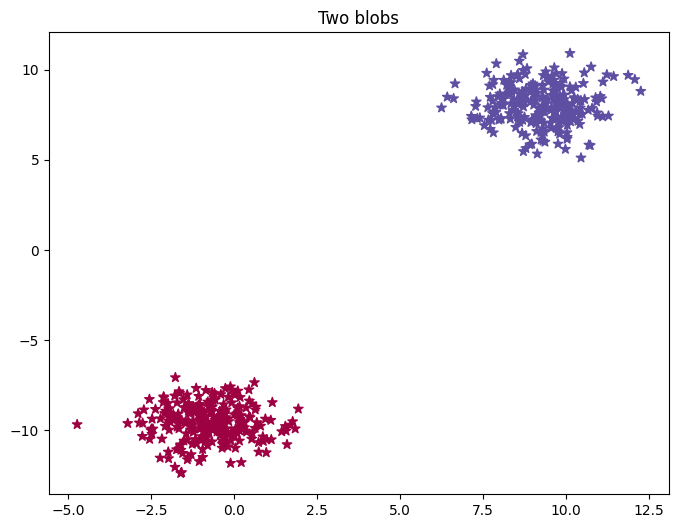

In [479]:
plt.figure(figsize=(8, 6))
plt.title("Two blobs")
plt.scatter(X[:, 0], X[:, 1], marker="*", c=Y, s=50, cmap ="Spectral")

In [480]:

parameters, iteration_data , param_data = train(X,Y,learning_rate= 0.1 ,epoch = 100 ,iteration_data = True , param_data = True)

 
 Randomly initialized initial parameters : 

{'w1': 0.00047241354039062025, 'w2': 0.0008946898747062856, 'b': 0.0005499335554862425}


Epoch 0, Error: 0.00849414400059981
Epoch 10, Error: 0.004940209797382021
Epoch 20, Error: 0.003499541334378981
Epoch 30, Error: 0.0027152272931328662
Epoch 40, Error: 0.002220814437986924
Epoch 50, Error: 0.0018802006409354153
Epoch 60, Error: 0.0016310728985997392
Epoch 70, Error: 0.001440825686155878
Epoch 80, Error: 0.0012907263791709406
Epoch 90, Error: 0.0011692393658998923
Epoch 100, Error: 0.0010688692409340863


Training Completed, Final Parameters are : 
{'w1': 0.30299150251820584, 'w2': 0.6624255236415906, 'b': -0.015146005127215569}


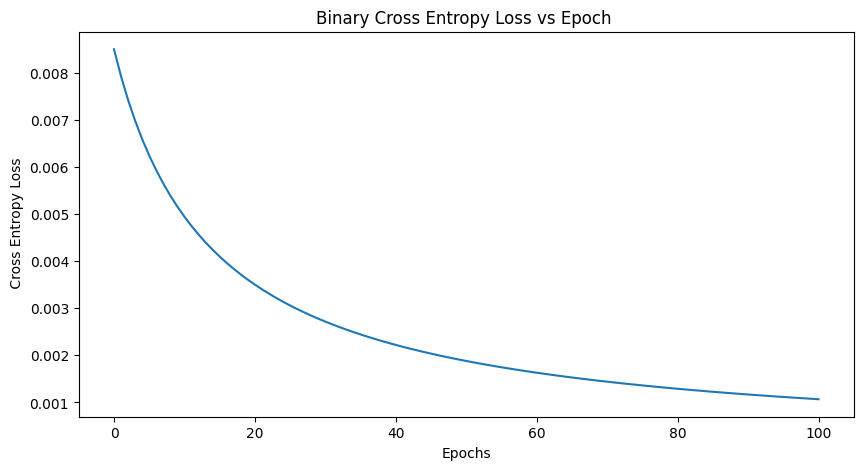

In [481]:
plot_epochs(iteration_data)

In [486]:
def plot(X, Y, parameters):
    w1,w2,b = parameters["w1"],parameters["w2"],parameters["b"] 
    # Calculating the intercept and gradient of the decision boundary.
    c = -b/w2
    m = -w1/w2

    xmin, xmax = np.min(X[:,0]),np.max(X[:,0])
    ymin, ymax = np.min(X[:,1]),np.max(X[:,1])

    xd = np.array([xmin, xmax])
    yd = m*xd + c


    plt.figure(figsize=(8, 6))
    plt.title("Decision Boundary Plot")
    plt.scatter(X[:, 0], X[:, 1], marker="*", c=Y, s=50, cmap ="Spectral")
    plt.plot(xd, yd, 'k', lw=1, ls='--') # draw line


    plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.1)
    plt.fill_between(xd, yd, ymax, color='tab:red', alpha=0.1)


    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.ylabel('X 2')
    plt.xlabel('x 1')
    plt.show()

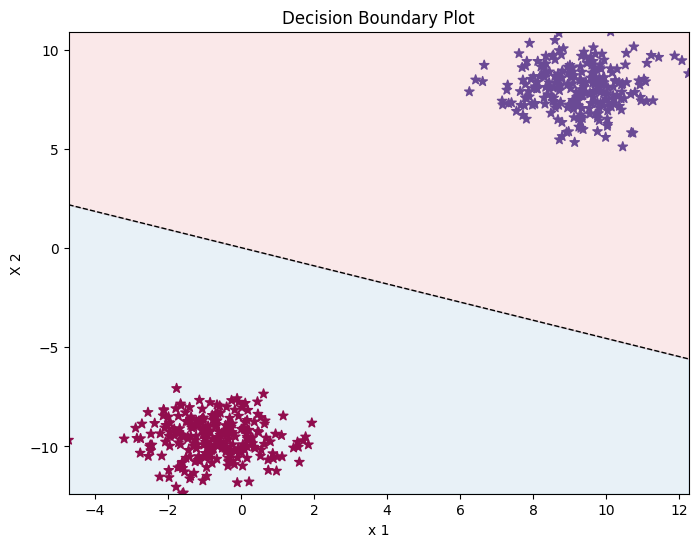

In [487]:
plot(X,Y,parameters)